## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning


![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414412237&di=8377c38d7b50c6f8d45b92ccc78dc1e7&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_jpg%2FlSyiavfm6wPgQDuDYa42IMgSkLOcPJU91RbkMibGy7VHLrhhNVLibTYk1iaLcmXKTdHc4icTDVia59QFXwqpW8cLflaw%2F640%3Fwx_fmt%3Djpeg)

In [2]:
from sklearn.datasets import load_boston
data = load_boston()
print(data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

这里假设拟合函数
$$\hat{y}=\hat{k}x+\hat{b}$$
已知一系列的点$(x_i, y_i)$,求$k, b$使得：
$$ min \quad loss=\frac{1}{n}\sum(y_i-\hat{y_i})^2$$

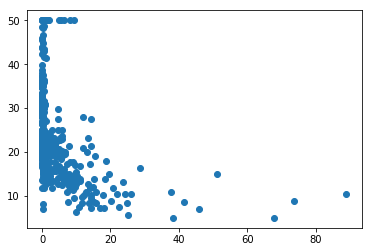

In [9]:
x,y = data['data'][:, 0], data['target'] # x:per capita crime rate by town,  y:Median value of owner-occupied homes in $1000's
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x, y)  #所有的犯罪数据 第一列

In [30]:
import random
def y_hat(k, b):
    return k*x+b
def loss_func(y, y_hat):
    return 1/len(y)*sum((y_i-y_hat_i)**2 for y_i, y_hat_i in zip(y,y_hat) ) #!


###### 1. Random Choose Method to get optimal *k* and *b*

In [36]:
min_loss=float('inf')
best_k = 0
best_b = 0
for i in range(1000):
    k = random.random()*200 - 100
    b = random.random()*200 - 100
    loss = loss_func(y, y_hat(k, b))
    if loss<min_loss:
        min_loss=loss
        best_k = k
        best_b = b
    if i%100==0: print(i,best_k, best_b, min_loss)

0 -32.66241255073932 92.72356917733086 79010.60688491014
100 2.994669253772102 40.84464592882776 1773.5349863702363
200 -0.606391370107076 2.598501178417763 563.6256037298183
300 -0.606391370107076 2.598501178417763 563.6256037298183
400 -0.43813188274992854 11.33429048368609 235.0507573325703
500 -1.773248374828995 30.260576983542563 210.20773512401982
600 -1.773248374828995 30.260576983542563 210.20773512401982
700 -1.773248374828995 30.260576983542563 210.20773512401982
800 -1.773248374828995 30.260576983542563 210.20773512401982
900 -1.773248374828995 30.260576983542563 210.20773512401982


###### 2.Supervised Direction to get optimal *k* and *b*

In [63]:
min_loss=float('inf')
best_k, best_b = 0,0
directioins=[
    (+1, +1),
    (+1, -1),
    (-1, +1),
    (-1, -1),
]
k = random.random()*200 - 100
b = random.random()*200 - 100
current_direct = random.choice(directioins)
for i in range(1000):
    k_direct, b_direct = current_direct
    k = best_k + 0.1*k_direct
    b = best_b + 0.1*b_direct
    loss = loss_func(y, y_hat(k, b))
    if loss<min_loss:
        min_loss=loss
        best_k = k
        best_b = b
    else:
        current_direct = random.choice(directioins)
    if i%100==0: print(i,best_k, best_b, min_loss)

0 -0.1 0.1 598.5515829070179
100 0.20000000000000004 4.200000000000001 409.8030809094979
200 2.7755575615628914e-17 9.399999999999983 256.89015810276703
300 -0.09999999999999998 13.499999999999968 167.28109471413393
400 -0.19999999999999998 16.599999999999966 119.43485529843139
500 -0.19999999999999998 18.799999999999997 95.00799804625709
600 -0.3 20.900000000000027 80.13958431731926
700 -0.3 20.900000000000027 80.13958431731926
800 -0.3 20.900000000000027 80.13958431731926
900 -0.3 20.900000000000027 80.13958431731926


###### 3.Gradient Descent to get optimal *k* and *b*

由$$loss=\frac{1}{n}\sum(y_i-\hat{y_i})^2$$
所以$$\frac{\partial{loss}}{\partial{k}}=-\frac{2}{n}\sum x_i(y_i-\hat{y_i})$$
$$\frac{\partial{loss}}{\partial{b}}=-\frac{2}{n}\sum (y_i-\hat{y_i})$$

In [75]:
def partial_k(k, b):
    return -2/len(y)*sum(x_i*(y_i-y_hat_i) for x_i,y_i,y_hat_i in zip(x,y,y_hat(k,b)))
def partial_b(k, b):
    return -2/len(y)*sum(y_i-y_hat_i for y_i,y_hat_i in zip(y,y_hat(k,b)))

In [80]:
min_loss=float('inf')
best_k = random.random()*200 - 100
best_b = random.random()*200 - 100
for i in range(1000):
    k = best_k + (-0.001)*partial_k(best_k, best_b) #partial values can be very large
    b = best_b + (-0.001)*partial_b(best_k, best_b)
    loss = loss_func(y, y_hat(k, b))
    if loss<min_loss:
        min_loss=loss
        best_k = k
        best_b = b
    if i%100==0: print(i,best_k, best_b, min_loss)

0 46.85840513573741 59.73009755712498 207159.60986079226
100 -1.6023760084043204 52.425629387311886 758.6947958939747
200 -1.4163516812479242 47.98309281397944 560.6796575321213
300 -1.2594167935560552 44.2352602729134 419.7518396532939
400 -1.1270226825304543 41.07349704202819 319.4531957395385
500 -1.015331771146401 38.406156220729336 248.07042601846123
600 -0.9211065855307953 36.15592224132561 197.26714878338862
700 -0.8416159135121309 34.25756979921156 161.11034248533338
800 -0.7745556376772136 32.656073231536716 135.37746238734306
900 -0.7179819482008007 31.30501154279248 117.06331393410518


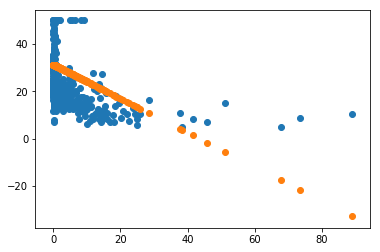

In [81]:
%matplotlib inline
plt.scatter(x, y)
plt.scatter(x, y_hat(-0.72,31.3))  

###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} \sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} \sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

In [90]:
def loss_func(y, y_hat):
    return 1/len(y)*sum( abs(y_i-y_hat_i) for y_i,y_hat_i in zip(y,y_hat) )
def partial_k(k, b):
    sum=0
    for i in range(len(x)):
        if y[i]>y_hat(k,b)[i]: sum += -x[i]
        elif y[i]==y_hat(k,b)[i]: pass
        else: sum += x[i]
    return sum
def partial_b(k, b):
    sum=0
    for i in range(len(x)):
        if y[i]>y_hat(k,b)[i]: sum += -1
        elif y[i]==y_hat(k,b)[i]: pass
        else: sum += 1
    return sum
# quite slow

In [94]:
learning_rate = 0.01
min_loss=float('inf')
best_k = random.random()*200 - 100
best_b = random.random()*200 - 100
for i in range(1000):
    k = best_k + -learning_rate*partial_k(best_k, best_b) 
    b = best_b + -learning_rate*partial_b(best_k, best_b)
    loss = loss_func(y, y_hat(k, b))
    if loss<min_loss:
        min_loss=loss
        best_k = k
        best_b = b
    if i%100==0: print(i,best_k, best_b, min_loss)

0 73.09195574440525 63.272346187624606 303.41453874170963
100 0.356337544405239 43.112346187624595 22.344990752388348
200 0.356337544405239 43.112346187624595 22.344990752388348
300 0.356337544405239 43.112346187624595 22.344990752388348
400 0.356337544405239 43.112346187624595 22.344990752388348
500 0.356337544405239 43.112346187624595 22.344990752388348
600 0.356337544405239 43.112346187624595 22.344990752388348
700 0.356337544405239 43.112346187624595 22.344990752388348
800 0.356337544405239 43.112346187624595 22.344990752388348
900 0.356337544405239 43.112346187624595 22.344990752388348


## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans: Because in most cases we don't know what the proper model is, but we can "learn" it by using machine learning methods.

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans: It's basically random, which will cost too much times to get the satisfying result.

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans: Yes, it is. The supervised direction doesn't change in the best path.

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans: Because we want to minimize the loss function.

###### 5. In the words 'Gradient Descent', what's the `Gradient` and what's the `Descent`?

Ans: The gradient is the partial derivative, and the descent means we change the virables in the opposite direction of gradient.

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans: It has the fastest speed to get the minimal loss function.

###### 7. Using the simple words to describe: What's the machine leanring.

Ans: **Machine learning** is an application of artificial intelligence (AI) that provides systems the ability to automatically learn and improve from experience without being explicitly programmed. 

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门



技术不精，暂时是直接去北京地铁官网上https://www.bjsubway.com/station/xltcx/ 去爬取的数据
<br>另外，也没有调用百度/高德API确定坐标

In [97]:
# 获取文本
import requests
import re
url = "https://www.bjsubway.com/station/xltcx"
response = requests.get(url, verify=False)
response.encoding = response.apparent_encoding
text = response.content.decode(response.encoding)
print(text)
# 是这样的，这个网站不规范，导致requests.get得到的中文乱码。怎么办？先找到它的encoding，再对response.content进行decode

E:\anaconda\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
E:\anaconda\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=gb2312" />
<title>站点及周边信息 | 北京地铁官方网站</title>
<meta name="keywords" content="北京地铁官方网站,地铁线路图,站内信息,站点首末车时间,公交换乘,服务设施,一卡通网点,站内立体示意图" />
<meta name="description" content="北京地铁线路查询，站点详细信息查询，能够更高效的获取地铁出行路线，得知指定站点的详细信息，使出行更加方便快捷。" />
<link rel="shortcut icon" href="/favicon.ico" type="image/x-icon" />
<link href="/subway/css/common.css" rel="stylesheet" type="text/css" />
<link href="/subway/css/search.css" rel="stylesheet" type="text/css" />
<script type="text/javascript" src="/subway/js/jquery.js"></script>
<script type="text/javascript" src="/subway/js/SubwayManager_min.js"></script>
</head>
<body>
<div class="wrap">
    <script>
var _hmt = _hmt || [];
(function() {
  var hm = document.createElement("script");
  hm.src = "https://hm.baidu.com/hm.js?01cf1cc88df5e

In [98]:
# 拿到所有站点
pattern = re.compile(r'<div class="station">.*?(?=[\u4e00-\u9fa5])([\u4e00-\u9fa5]+)')  #中文 [\u4e00-\u9fa5]
stations = pattern.findall(text)

In [99]:
# 获得一个列表，代表每条线上有多少地铁站
pattern = re.compile(r'<div class=("line_name"|"station")>')
li = pattern.findall(text)
num=[]
count=0
for i in li:
    if "line" in i:
        num.append(count)
        count=0
    else:
        count+=1
num.append(count)
del num[0]     

In [100]:
#获取站点名称列表，这里用xpath要简单一些，因为都是在<div class="line_name">下面的一个<div>里
import requests
from lxml import etree
r = requests.get("https://www.bjsubway.com/station/xltcx", verify=False) #!
html = r.content
selector = etree.HTML(html)
names = selector.xpath('//div[@class="line_name"]/div/text()')

E:\anaconda\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
E:\anaconda\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [101]:
import numpy as np
cum = np.cumsum(num)

edges=[]
for i in range(len(stations)):
    if i==0: continue
    if i in cum: continue
    edges.append((stations[i-1], stations[i]))

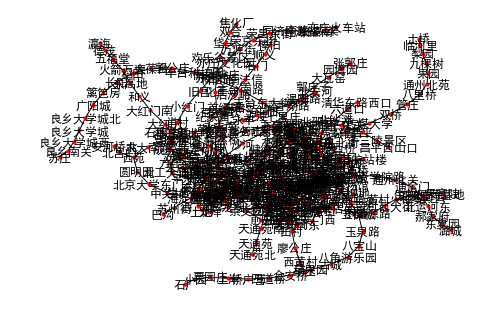

In [102]:
import networkx as nx
g = nx.Graph()
g.add_nodes_from(stations)
g.add_edges_from(edges)

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
nx.draw(g, with_labels=True, node_size=10)

In [103]:
subway = nx.to_dict_of_dicts(g)
subway

{'苹果园': {'古城': {}, '金安桥': {}, '杨庄': {}},
 '古城': {'苹果园': {}, '八角游乐园': {}},
 '八角游乐园': {'古城': {}, '八宝山': {}},
 '八宝山': {'八角游乐园': {}, '玉泉路': {}},
 '玉泉路': {'八宝山': {}, '五棵松': {}},
 '五棵松': {'玉泉路': {}, '万寿路': {}},
 '万寿路': {'五棵松': {}, '公主坟': {}},
 '公主坟': {'万寿路': {}, '军事博物馆': {}, '莲花桥': {}, '西钓鱼台': {}},
 '军事博物馆': {'公主坟': {}, '木樨地': {}, '北京西站': {}, '白堆子': {}},
 '木樨地': {'军事博物馆': {}, '南礼士路': {}},
 '南礼士路': {'木樨地': {}, '复兴门': {}},
 '复兴门': {'南礼士路': {}, '西单': {}, '长椿街': {}, '阜成门': {}},
 '西单': {'复兴门': {}, '天安门西': {}, '灵境胡同': {}, '宣武门': {}},
 '天安门西': {'西单': {}, '天安门东': {}},
 '天安门东': {'天安门西': {}, '王府井': {}},
 '王府井': {'天安门东': {}, '东单': {}},
 '东单': {'王府井': {}, '建国门': {}, '崇文门': {}, '灯市口': {}},
 '建国门': {'东单': {}, '永安里': {}, '朝阳门': {}, '北京站': {}},
 '永安里': {'建国门': {}, '国贸': {}},
 '国贸': {'永安里': {}, '大望路': {}, '金台夕照': {}, '双井': {}},
 '大望路': {'国贸': {}, '四惠': {}, '九龙山': {}, '朝阳公园': {}},
 '四惠': {'大望路': {}, '四惠东': {}},
 '四惠东': {'四惠': {}, '高碑店': {}},
 '西直门': {'积水潭': {}, '动物园': {}, '新街口': {}, '大钟寺': {}},
 '积水潭': {'西直门'

In [104]:
#广度优先
def search(c1, c2, connection_graph):
    pathes = [[c1]]
    visited = set()
    
    while pathes:
        path = pathes.pop(0) #抽出一条路来|同时原来pathes里面就没有了
        #我们现在看了很多条路，但是先抽最早的路==>∵最早扩展的路节点最少∴实际隐含了我们是按照转乘最少的方式来进行扩展的
        #就这两者确实是等价的
        frontier = path[-1] #这条路的最末端
        
        if frontier in visited: continue #又有后来的路走到这个点，就不用再扩展这个点了
        
        successors = connection_graph[frontier] #==> list
        for city in successors:
            if city in visited: continue #不能往回走啊
            new_path = path + [city]
            if city == c2: return new_path #只要找到一条，就结束了?
            pathes.append(new_path)
        
        visited.add(frontier)
        #pathes = sort_candidate(pathes)  #这里传入一个函数
        #在这里就加了一个排序函数，对我们搜索策略进行控制
    return "No path!"
        
    

In [105]:
search("人民大学","南锣鼓巷",subway)

['人民大学', '魏公村', '国家图书馆', '动物园', '西直门', '积水潭', '鼓楼大街', '什刹海', '南锣鼓巷']

## （Optional）Create different policies for transfer system.


以下部门为可选部分，请酌情完成。 并不要求全部同学完成。

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


恭喜，完成本次课程，你对常用的人工智能方法以及有一定的了解了。基于规则的，基于概率模型的，基于搜索的，基于机器学习的。 可以说，我们现在通常见到的方法都能够归属到这几类方法中。 这就是**人工智能**，并没有很难是吧？ 继续加油！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)